In [1]:
import numpy as np# Imports 
import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Parameters
n_cities = 10
n_population = 100
mutation_rate = 0.3
random.seed(a = 10) 

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,20,n_cities),np.random.randint(0,20,n_cities))]
city = []
for i in range(n_cities):
    city.append(chr(ord('A') + i)) 
names_list = np.array(city)
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'A': [0, 16],
 'B': [3, 13],
 'C': [2, 16],
 'D': [13, 19],
 'E': [19, 2],
 'F': [18, 11],
 'G': [16, 3],
 'H': [7, 11],
 'I': [4, 1],
 'J': [8, 19]}

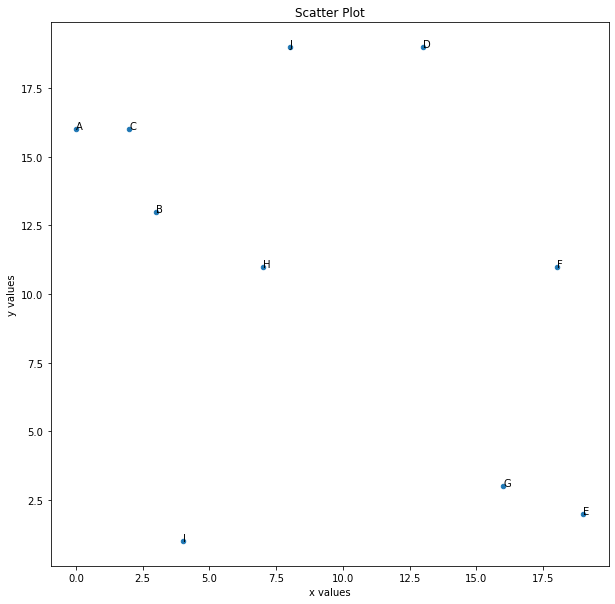

In [27]:
def draw_map(cities_dict,route = []):
    x = []
    y = []
    cities = []
    for city,coor in cities_dict.items():
        x.append(coor[0])
        y.append(coor[1])
        cities.append(city)
    draw_scatterplot(x,y,cities)
    
    if len(route) != 0:
        for i in range(len(route)-1):
            d_x = [cities_dict[route[i]][0],cities_dict[route[i+1]][0]]
            d_y = [cities_dict[route[i]][1],cities_dict[route[i+1]][1]]
            plt.plot(d_x,d_y)

            distance = compute_city_distance_names(route[i], route[i+1], cities_dict)
            distance = str(round(distance,2))
            
            plt.annotate(distance, (0.5*(d_x[0]+d_x[1])+1,0.5*(d_y[0]+d_y[1])+1))
            
        for i,city in enumerate(route):
            plt.annotate(str(i)+". "+city, (cities_dict[route[i]][0], cities_dict[route[i]][1]))
    else:
        for i,city in enumerate(cities):
            plt.annotate(city, (x[i], y[i]))
    plt.show()
    
def draw_scatterplot(x_values, y_values,cities):
    plt.figure(figsize=(10,10))
    plt.scatter(x_values, y_values, s=20)
    plt.title("Scatter Plot")
    plt.xlabel("x values")
    plt.ylabel("y values")

draw_map(cities_dict)

In [5]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['A', 'I', 'D', 'E', 'J', 'G', 'F', 'C', 'H', 'B'],
       ['C', 'H', 'G', 'A', 'D', 'I', 'B', 'F', 'J', 'E'],
       ['I', 'C', 'J', 'A', 'H', 'F', 'B', 'D', 'E', 'G'],
       ['C', 'A', 'B', 'D', 'I', 'G', 'H', 'E', 'J', 'F'],
       ['H', 'A', 'D', 'G', 'J', 'E', 'F', 'B', 'I', 'C'],
       ['J', 'D', 'C', 'A', 'E', 'G', 'I', 'B', 'F', 'H'],
       ['D', 'C', 'E', 'J', 'G', 'A', 'I', 'B', 'F', 'H'],
       ['I', 'F', 'H', 'B', 'E', 'C', 'A', 'J', 'D', 'G'],
       ['G', 'I', 'F', 'J', 'D', 'C', 'A', 'E', 'H', 'B'],
       ['J', 'I', 'C', 'D', 'H', 'E', 'B', 'G', 'A', 'F'],
       ['A', 'H', 'E', 'G', 'C', 'D', 'B', 'I', 'F', 'J'],
       ['I', 'D', 'C', 'B', 'F', 'H', 'A', 'E', 'G', 'J'],
       ['E', 'F', 'C', 'I', 'B', 'A', 'H', 'G', 'D', 'J'],
       ['A', 'G', 'B', 'J', 'C', 'H', 'I', 'E', 'D', 'F'],
       ['E', 'H', 'G', 'J', 'I', 'A', 'D', 'B', 'C', 'F'],
       ['E', 'F', 'J', 'G', 'B', 'A', 'I', 'H', 'C', 'D'],
       ['H', 'D', 'E', 'I', 'A', 'G', 'B', 'F', 'C', 'J'

In [6]:
# 2. Evaluation of the fitness

#individual solution
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [7]:
#All solutions
def get_all_fitnes(population_set, cities_dict,n_population):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list
                   
fitnes_list = get_all_fitnes(population_set,cities_dict,n_population)
len(fitnes_list)

100

In [82]:
# 3. Selecting the progenitors
## 3a. Roulette selection
def roulette_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = roulette_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['G', 'E', 'A', 'H', 'D', 'F', 'B', 'I', 'J', 'C'], dtype='<U1')

In [83]:
## 3b. Tournament Selection
def tournament_selection(population_set, fitnes_list):
    progenitor_list = [[],[]]
    for i in range(2):
        temp_list_a = np.random.choice(list(range(len(population_set))), len(population_set), replace=True)
        temp_list_b = np.random.choice(list(range(len(population_set))), len(population_set), replace=True)
        for j in range(len(temp_list_a)):
            fitnes_a = fitnes_list[temp_list_a[i]]
            fitnes_b = fitnes_list[temp_list_b[i]]
            if fitnes_b>fitnes_a:
                temp_list_a[i] = temp_list_b[i]
        progenitor_list[i] = temp_list_a.copy()
        
    progenitor_list[0] = population_set[progenitor_list[0]]
    progenitor_list[1] = population_set[progenitor_list[1]]
    return np.array(progenitor_list)

progenitor_list = tournament_selection(population_set,fitnes_list)
progenitor_list

array([[['I', 'F', 'H', ..., 'J', 'D', 'G'],
        ['C', 'J', 'A', ..., 'I', 'H', 'G'],
        ['D', 'E', 'I', ..., 'B', 'F', 'A'],
        ...,
        ['E', 'F', 'C', ..., 'G', 'D', 'J'],
        ['B', 'G', 'H', ..., 'F', 'A', 'I'],
        ['G', 'J', 'A', ..., 'E', 'D', 'C']],

       [['I', 'E', 'A', ..., 'D', 'C', 'B'],
        ['D', 'E', 'I', ..., 'B', 'F', 'A'],
        ['F', 'I', 'B', ..., 'G', 'D', 'C'],
        ...,
        ['H', 'C', 'J', ..., 'A', 'F', 'G'],
        ['F', 'I', 'B', ..., 'G', 'D', 'C'],
        ['E', 'F', 'J', ..., 'H', 'C', 'D']]], dtype='<U1')

In [84]:
## 3c. Rank Based Wheel Selection
def rank_selection(population_set, fitnes_list):
    n = len(population_set)
    total = n*(n+1)/2

    fitnes_list, population_set = zip(*sorted(zip(fitnes_list, population_set), key=lambda x: x[0]))
    prob_list = np.arange(1,len(population_set)+1,1,float)/total
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = np.array(population_set)[progenitor_list_a]
    progenitor_list_b = np.array(population_set)[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

progenitor_list = rank_selection(population_set,fitnes_list)
progenitor_list

array([[['G', 'E', 'A', ..., 'I', 'J', 'C'],
        ['G', 'D', 'H', ..., 'A', 'B', 'E'],
        ['F', 'I', 'D', ..., 'C', 'A', 'B'],
        ...,
        ['I', 'D', 'C', ..., 'H', 'E', 'J'],
        ['I', 'F', 'J', ..., 'A', 'H', 'G'],
        ['J', 'D', 'G', ..., 'B', 'I', 'C']],

       [['I', 'C', 'J', ..., 'D', 'E', 'G'],
        ['G', 'E', 'A', ..., 'I', 'J', 'C'],
        ['D', 'G', 'A', ..., 'H', 'J', 'F'],
        ...,
        ['J', 'H', 'A', ..., 'G', 'I', 'E'],
        ['D', 'E', 'B', ..., 'J', 'F', 'I'],
        ['F', 'E', 'D', ..., 'A', 'B', 'C']]], dtype='<U1')

In [10]:
# Pairs crossover
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
# Finding pairs of mates
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['G', 'I', 'C', 'F', 'D', 'B', 'A', 'H', 'E', 'J'], dtype='<U1')

In [11]:
#Offspring production
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
# New populaiton generation
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop
mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['G', 'I', 'D', 'F', 'C', 'B', 'E', 'H', 'A', 'J'], dtype='<U1')

In [79]:
selection = ["Roulette Wheel Selection","Tournament Selection","Rank Based Wheel Selection"]

In [85]:
# Everything put together
def test(cities_dict,population_set,fitnes_list,mutated_pop,n_population,sel_m = 0):
    best_solution = [-1,np.inf,np.array([])]
    print(f"Selection used:{selection[sel_m]}")
    for i in range(1000):
        if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        fitnes_list = get_all_fitnes(mutated_pop,cities_dict,n_population)

        #Saving the best solution
        if fitnes_list.min() < best_solution[1]:
            best_solution[0] = i
            best_solution[1] = fitnes_list.min()
            best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

        #Selection
        if sel_m == 0:
            progenitor_list = roulette_selection(population_set,fitnes_list)
        elif sel_m == 1:
            progenitor_list = tournament_selection(population_set,fitnes_list)
        elif sel_m == 2:
            progenitor_list = rank_selection(population_set,fitnes_list)

        # Mating
        new_population_set = mate_population(progenitor_list)

        # Mutation
        mutated_pop = mutate_population(new_population_set)
        
    return best_solution

In [86]:
best_solution = []
for i in range(len(selection)):
    best_solution.append(test(cities_dict,population_set,fitnes_list,mutated_pop,n_population,sel_m=i))

Selection used:Roulette Wheel Selection
0 75.75107371530176 114.99727074900545 28/10/22 19:11
100 76.1922104580985 113.11284966391003 28/10/22 19:11
200 74.51416375190153 114.07047577638409 28/10/22 19:11
300 80.59100946431562 112.85145398633559 28/10/22 19:11
400 65.33566691539679 113.19545154875223 28/10/22 19:11
500 82.26612342442421 114.45664478568929 28/10/22 19:11
600 80.34840615397687 117.3384650923508 28/10/22 19:11
700 78.78361885449803 115.10630858703605 28/10/22 19:11
800 73.77085927465713 116.07997688426418 28/10/22 19:11
900 81.68998705853775 112.3753813113412 28/10/22 19:11
Selection used:Tournament Selection
0 75.75107371530176 114.99727074900545 28/10/22 19:11
100 78.55314928362718 113.35338914921381 28/10/22 19:11
200 82.3394664084752 115.38330066261113 28/10/22 19:11
300 79.55631256219888 116.38983333650113 28/10/22 19:11
400 86.77307208791638 116.12246234302991 28/10/22 19:11
500 72.81040092539348 113.32104368467722 28/10/22 19:11
600 66.9140442204811 113.25109434576

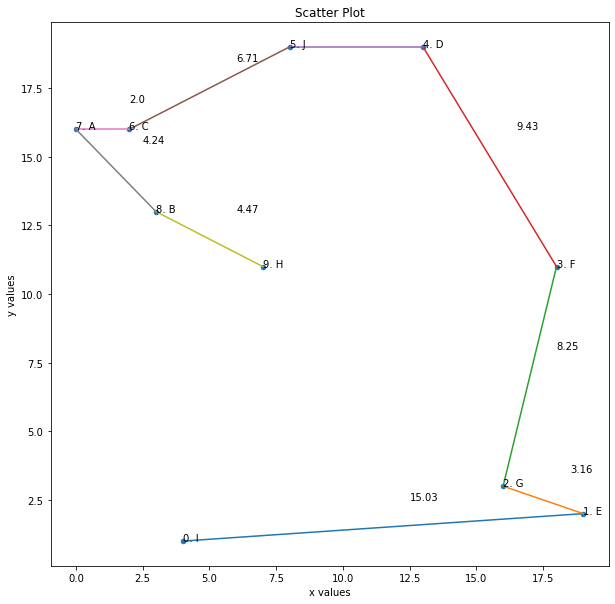

[857, 58.29874699645144, array([['I', 'E', 'G', 'F', 'D', 'J', 'C', 'A', 'B', 'H']], dtype='<U1')]


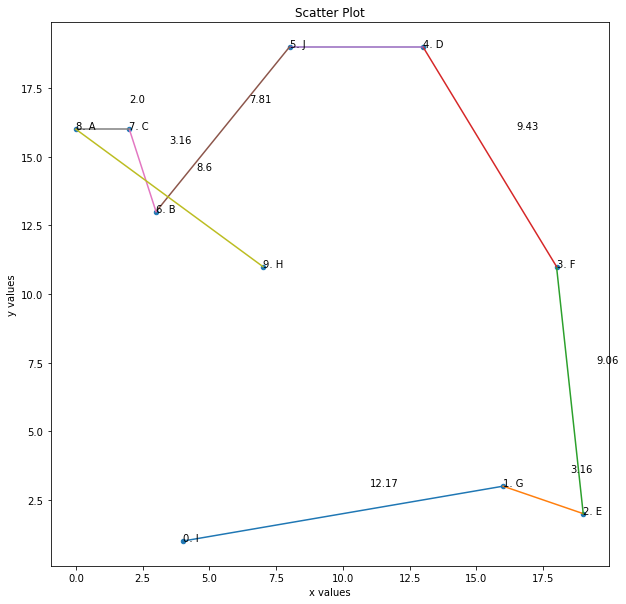

[171, 60.392021594076496, array([['I', 'G', 'E', 'F', 'D', 'J', 'B', 'C', 'A', 'H']], dtype='<U1')]


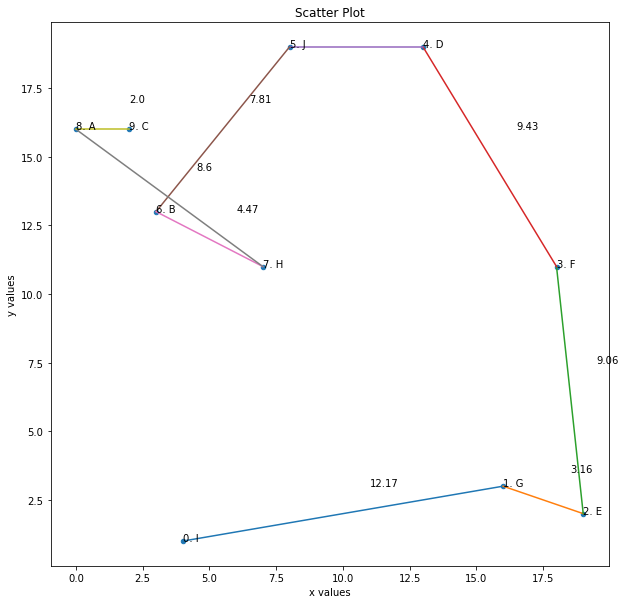

[748, 61.7018798889077, array([['I', 'G', 'E', 'F', 'D', 'J', 'B', 'H', 'A', 'C']], dtype='<U1')]


In [87]:
draw_map(cities_dict,route = best_solution[0][2][0])
print(best_solution[0])
draw_map(cities_dict,route = best_solution[1][2][0])
print(best_solution[1])
draw_map(cities_dict,route = best_solution[2][2][0])
print(best_solution[2])

In [33]:
num = [80,75,70,65,60,55,50,45,40,35]
total_Fx = 0
for i in range(len(num)):
    total_Fx += num[i]/(11-i)

In [34]:
total_Fx

100.49693362193362

In [37]:
80/(11-10)

80.0

In [ ]:
1/